In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings 
warnings.filterwarnings('ignore') 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv
/kaggle/input/flood-prediction-dataset/sample_submission.csv/sample_submission.csv
/kaggle/input/flood-prediction-dataset/train.csv/train.csv
/kaggle/input/flood-prediction-dataset/test.csv/test.csv


# **Import the Dataset and Characteristics of the Dataset**

**Import the Dataset!**

In [2]:
flood_dataset = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")                           

**Dataset's Characteristics :** Column Names, Dimension, and Statisitics with Visualization

Description of some columns of the this dataset!!

**1.	Coastal Vulnerability:** This variable shows how susceptible coastal regions are to tidal flooding and storm surges.

**2.	Landslides:** It describes the possibility of landslides, which can obstruct river courses and cause flash floods.

**3.	Watersheds:** This variable describes how well watersheds are doing. Watersheds are essential for controlling water flow and averting flooding.

**4.	Deteriorating Infrastructure:** It examines the roads, bridges, and levees that may have an impact on the ability to control flooding.

**5.	PopulationScore:** The distribution and density of people in flood-prone locations, which affects flood resistance and susceptibility.

**6.	Wetland Loss:** the disappearance of wetlands, which naturally absorb and store extra water to prevent floods.

**7.	Inadequate Planning:** The ability of flood mitigation techniques and land use planning to lower the danger of flooding.

**8.	PoliticalFactors:** A continuous variable that reflects the governance and political aspects influencing the policies and infrastructure investments related to flood management.

**9.	FloodingProbability:** Based on a number of variables and historical data, this target variable indicates the possibility or probability of flooding.

**10.	Monsoon Intensity:** The amount of rainfall during the monsoon season, which is a major cause of floods.

**11.	TopographyDrainage:** A continuous variable that reflects the topography's ability to drain water and affects how water moves during periods of intense precipitation. Here are a few of the characteristics.


In [3]:
flood_dataset.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [4]:
flood_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
flood_dataset.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [6]:
flood_dataset.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


# **EDA : Histogram Analysis**

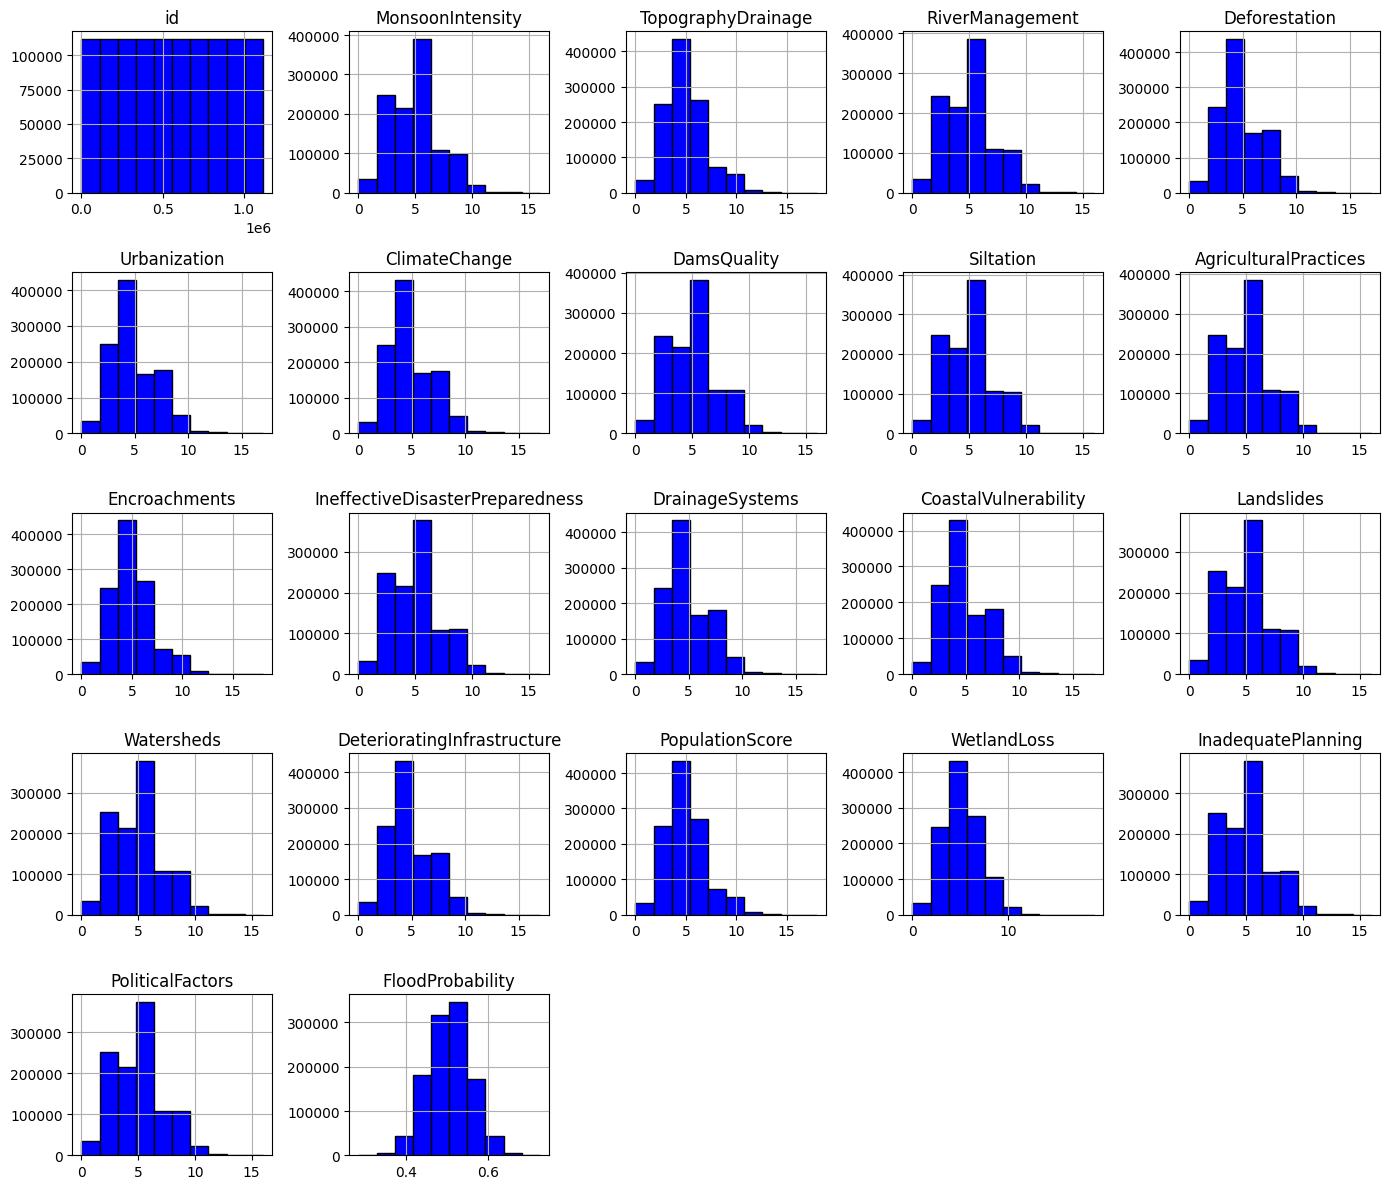

In [7]:
from matplotlib import pyplot as grph 
flood_dataset.hist(figsize=(14, 12), color='blue', edgecolor='black')
grph.tight_layout()
grph.show()

# **EDA : ScatterPlot**

***1. Scatter plot between MonsoonIntensity and FloodProbability 
AND 2. Scatter plot between TopographyDrainage and FloodProbability***

Text(0, 0.5, 'FloodProbability')

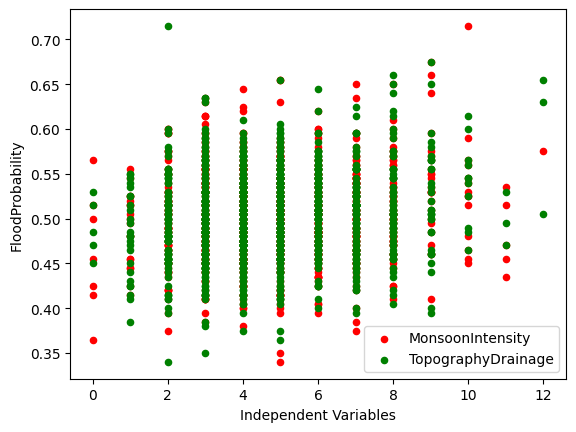

In [8]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='MonsoonIntensity', y='FloodProbability', color='r', label='MonsoonIntensity')
ax2=flood_dataset[:1000].plot(kind='scatter', x='TopographyDrainage', y='FloodProbability', color='g', label='TopographyDrainage', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between RiverManagement and FloodProbability 
AND 2. Scatter plot between Deforestation and FloodProbability***

Text(0, 0.5, 'FloodProbability')

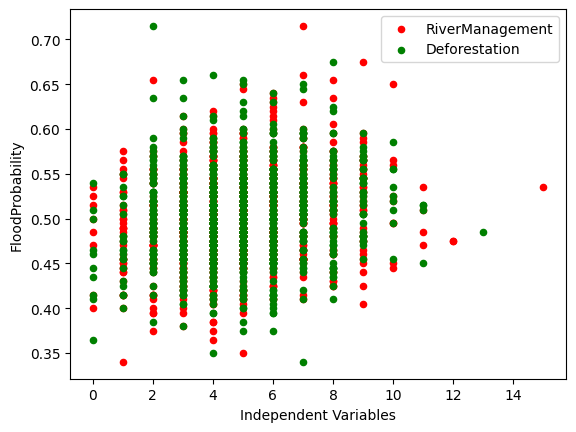

In [9]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='RiverManagement', y='FloodProbability', color='r', label='RiverManagement')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Deforestation', y='FloodProbability', color='g', label='Deforestation', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between Urbanization and FloodProbability 
AND 2. Scatter plot between ClimateChange and FloodProbability***

Text(0, 0.5, 'FloodProbability')

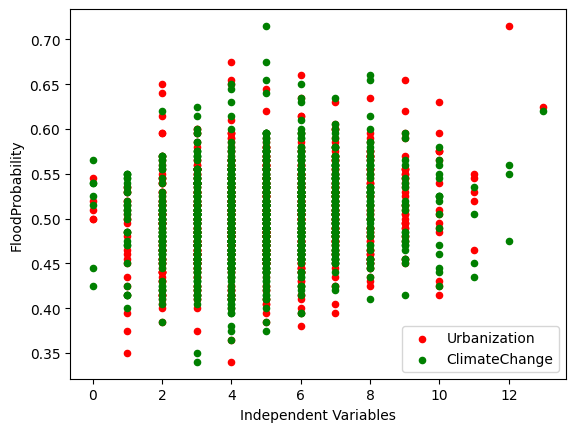

In [10]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='Urbanization', y='FloodProbability', color='r', label='Urbanization')
ax2=flood_dataset[:1000].plot(kind='scatter', x='ClimateChange', y='FloodProbability', color='g', label='ClimateChange', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between DamsQuality and FloodProbability 
AND 2. Scatter plot between Siltation and FloodProbability***

Text(0, 0.5, 'FloodProbability')

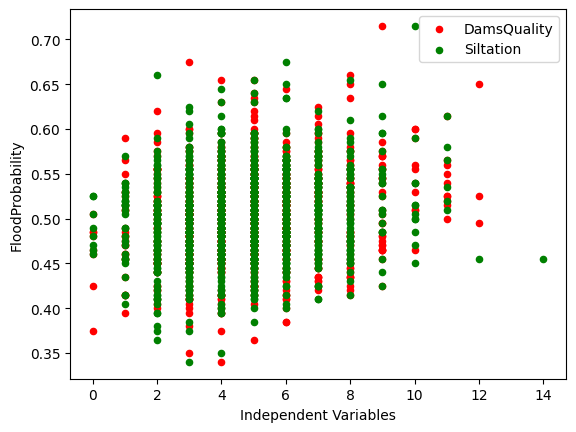

In [11]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='DamsQuality', y='FloodProbability', color='r', label='DamsQuality')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Siltation', y='FloodProbability', color='g', label='Siltation', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between AgriculturalPractices and FloodProbability 
AND 2. Scatter plot between Encroachments and FloodProbability***

Text(0, 0.5, 'FloodProbability')

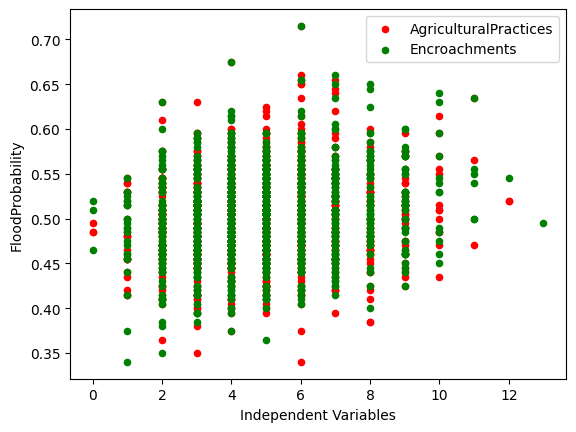

In [12]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='AgriculturalPractices', y='FloodProbability', color='r', label='AgriculturalPractices')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Encroachments', y='FloodProbability', color='g', label='Encroachments', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between IneffectiveDisasterPreparedness and FloodProbability 
AND 2. Scatter plot between DrainageSystems and FloodProbability***

Text(0, 0.5, 'FloodProbability')

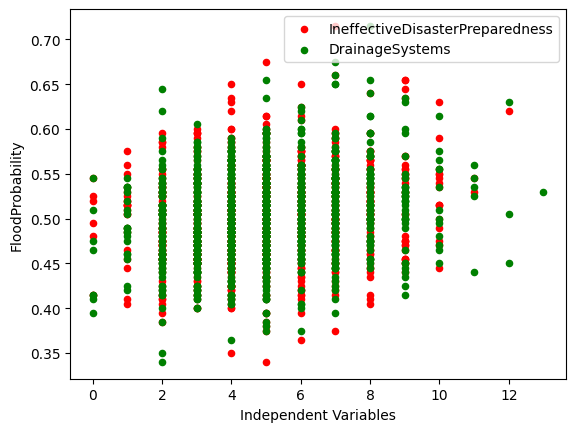

In [13]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='IneffectiveDisasterPreparedness', y='FloodProbability', color='r', label='IneffectiveDisasterPreparedness')
ax2=flood_dataset[:1000].plot(kind='scatter', x='DrainageSystems', y='FloodProbability', color='g', label='DrainageSystems', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between CoastalVulnerability and FloodProbability 
AND 2. Scatter plot between Landslides and FloodProbability***

Text(0, 0.5, 'FloodProbability')

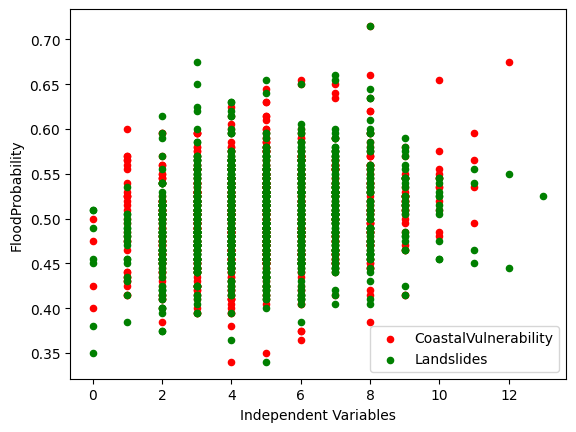

In [14]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='CoastalVulnerability', y='FloodProbability', color='r', label='CoastalVulnerability')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Landslides', y='FloodProbability', color='g', label='Landslides', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between Watersheds and FloodProbability 
AND 2. Scatter plot between DeterioratingInfrastructure and FloodProbability***

Text(0, 0.5, 'FloodProbability')

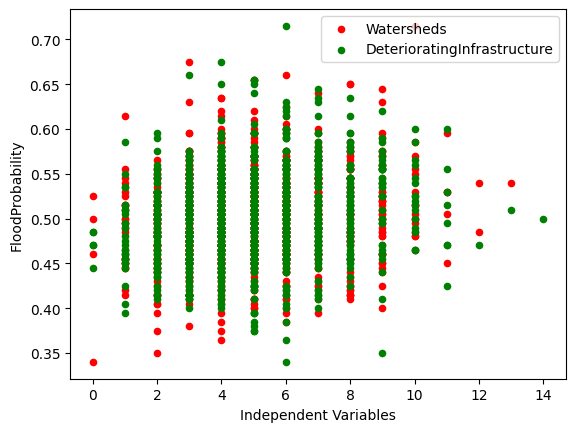

In [15]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='Watersheds', y='FloodProbability', color='r', label='Watersheds')
ax2=flood_dataset[:1000].plot(kind='scatter', x='DeterioratingInfrastructure', y='FloodProbability', color='g', label='DeterioratingInfrastructure', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between PopulationScore and FloodProbability 
AND 2. Scatter plot between WetlandLoss and FloodProbability***

Text(0, 0.5, 'FloodProbability')

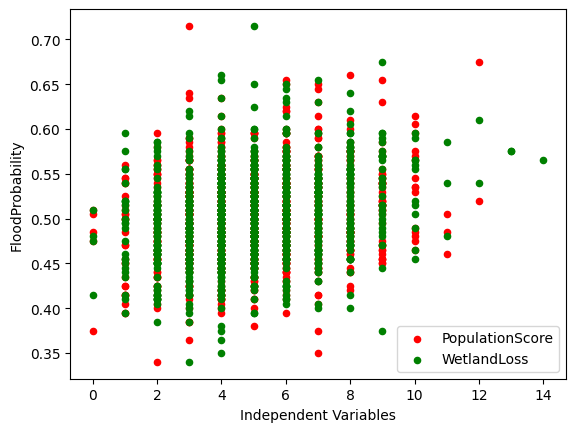

In [16]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='PopulationScore', y='FloodProbability', color='r', label='PopulationScore')
ax2=flood_dataset[:1000].plot(kind='scatter', x='WetlandLoss', y='FloodProbability', color='g', label='WetlandLoss', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

***1. Scatter plot between InadequatePlanning and FloodProbability 
AND 2. Scatter plot between PoliticalFactors and FloodProbability***

Text(0, 0.5, 'FloodProbability')

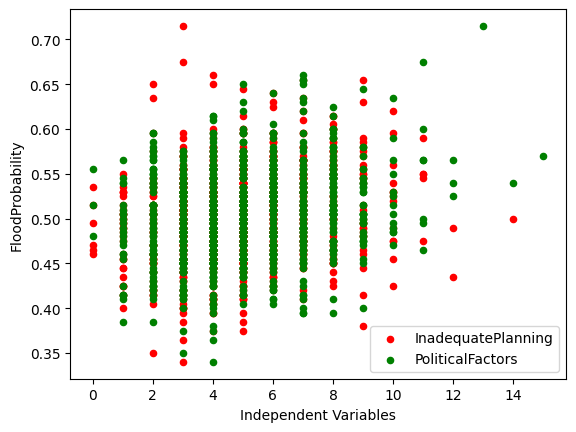

In [17]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='InadequatePlanning', y='FloodProbability', color='r', label='InadequatePlanning')
ax2=flood_dataset[:1000].plot(kind='scatter', x='PoliticalFactors', y='FloodProbability', color='g', label='PoliticalFactors', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

**EDA : Box Plot**

In [18]:
selected_attributes = flood_dataset.select_dtypes(include=['int64', 'float64']).columns.drop('id')

In [19]:
import seaborn as snb

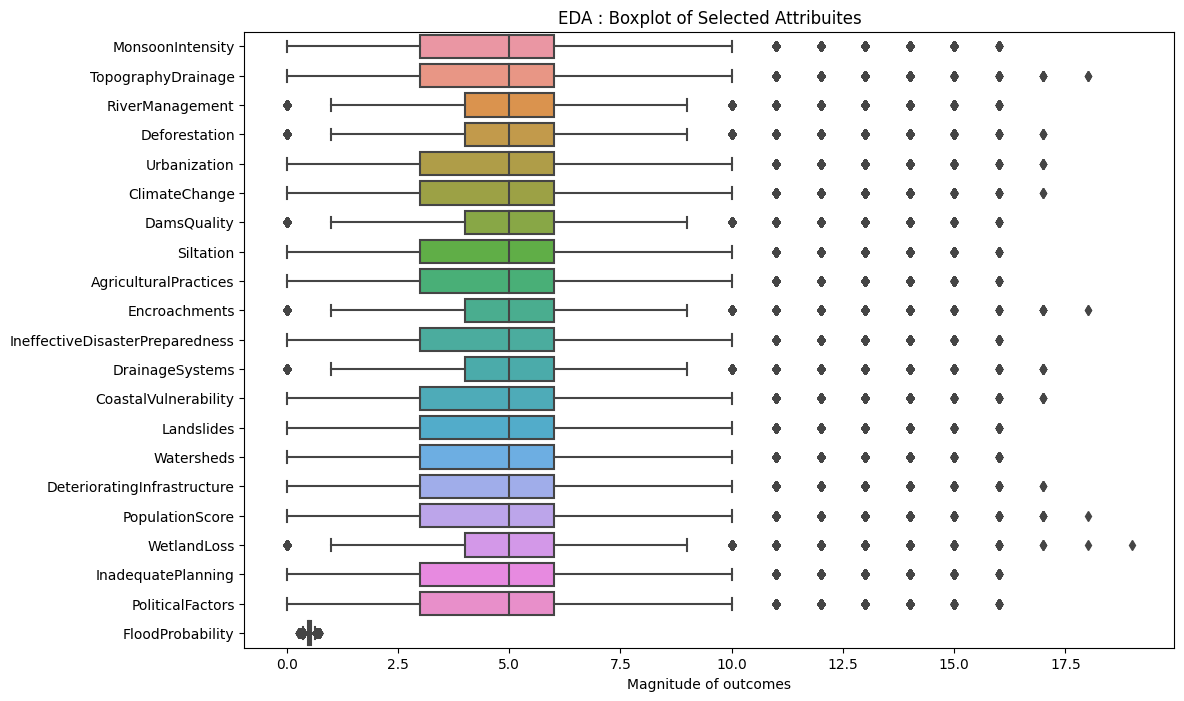

In [20]:
grph.figure(figsize=(12, 8))
snb.boxplot(data=flood_dataset[selected_attributes], orient="h")
grph.title('EDA : Boxplot of Selected Attribuites')
grph.xlabel('Magnitude of outcomes')
grph.show()

In [21]:
flood_dataset.shape

(1117957, 22)

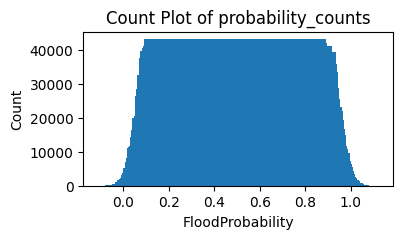

In [22]:
probability_counts = flood_dataset['FloodProbability'].value_counts()
grph.figure(figsize=(4, 2))
grph.bar(probability_counts.index, probability_counts)
grph.title('Count Plot of probability_counts')
grph.xlabel('FloodProbability')
grph.ylabel('Count')
grph.show()

In [23]:
probability_counts.sort_values

<bound method Series.sort_values of FloodProbability
0.490    43320
0.495    42302
0.520    41266
0.485    41156
0.505    41126
         ...  
0.700       32
0.725       29
0.715       26
0.710       23
0.285       20
Name: count, Length: 83, dtype: int64>

# EDA : Correaltion Matrix

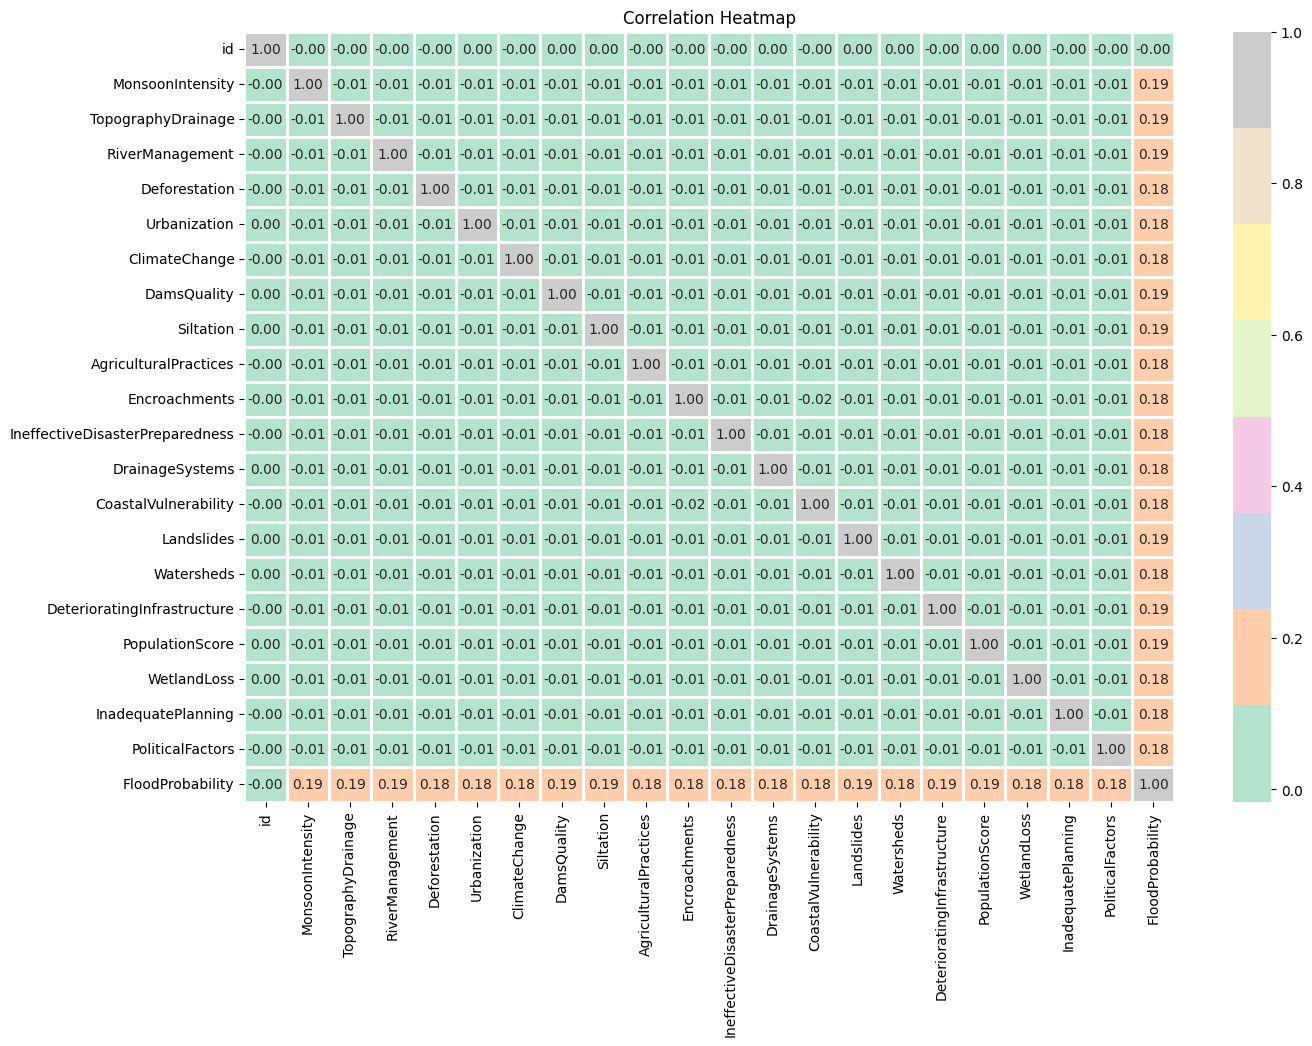

In [24]:
grph.figure(figsize=(15, 10))
snb.heatmap(flood_dataset.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
grph.title('Correlation Heatmap')
grph.show()

# **Logistic Regression Method, Decision Tree Classifier and Random Forest Classifier to obtain the feature matrix**

For null value check

In [25]:
flood_dataset.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [26]:
flood_dataset.drop(columns=['id'], inplace=True)
flood_dataset_train = flood_dataset.drop(['FloodProbability'],axis=1)

In [27]:
flood_dataset_train_copy = flood_dataset_train.copy()

**Data Preprocessing Step : Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(flood_dataset_train)
flood_dataset_train = scaler.transform(flood_dataset_train)

In [29]:
dependent_var = flood_dataset['FloodProbability']

In [30]:
flood_dataset_train

array([[ 0.03819786,  1.46776894,  0.02156078, ...,  0.02375436,
         0.98956852, -0.92759812],
       [ 0.52448798,  0.99018623, -0.46102151, ..., -0.94303876,
        -0.45196156, -0.92759812],
       [ 0.52448798,  0.0350208 ,  0.50414306, ..., -1.42643532,
        -0.93247159, -0.92759812],
       ...,
       [ 1.01077809, -0.92014462,  1.95188991, ...,  0.02375436,
        -1.41298162, -0.44920913],
       [ 1.01077809, -0.92014462, -0.94360379, ...,  0.99054749,
         0.50905849, -0.44920913],
       [-0.44809225,  0.0350208 ,  0.50414306, ...,  0.99054749,
         0.98956852,  1.46434681]])

**Data PreProcessing Step : Label Encoding**

In [31]:
from sklearn import preprocessing
from sklearn import utils

Encode_Data = preprocessing.LabelEncoder()
dependent_var_transformed = Encode_Data.fit_transform(dependent_var)

print(dependent_var_transformed)

[27 28 44 ... 35 37 50]


# Featured Engineering by Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
#X_train, x_test, y_train, y_test=train_test_split(flood_dataset_train, dependent_var, test_size=0.3, random_state=10)

In [34]:
flood_dataset_train_partially = flood_dataset_train[:1500].copy()
dependent_var_transformed_partially = dependent_var_transformed[:1500].copy()

In [35]:
flood_dataset_train_partially.shape , dependent_var_transformed_partially.shape

((1500, 20), (1500,))

In [36]:
model_LR=LogisticRegression(solver="liblinear")
model_LR.fit(flood_dataset_train_partially, dependent_var_transformed_partially)

LogisticRegression(solver='liblinear')

Featured name: 0, and its scored by Logistic Regression Model: -0.04974
Featured name: 1, and its scored by Logistic Regression Model: -0.14665
Featured name: 2, and its scored by Logistic Regression Model: -0.22214
Featured name: 3, and its scored by Logistic Regression Model: 0.10853
Featured name: 4, and its scored by Logistic Regression Model: -0.06506
Featured name: 5, and its scored by Logistic Regression Model: -0.11983
Featured name: 6, and its scored by Logistic Regression Model: -0.06407
Featured name: 7, and its scored by Logistic Regression Model: -0.09681
Featured name: 8, and its scored by Logistic Regression Model: 0.05440
Featured name: 9, and its scored by Logistic Regression Model: -0.26054
Featured name: 10, and its scored by Logistic Regression Model: 0.02653
Featured name: 11, and its scored by Logistic Regression Model: -0.20547
Featured name: 12, and its scored by Logistic Regression Model: -0.06553
Featured name: 13, and its scored by Logistic Regression Model: 

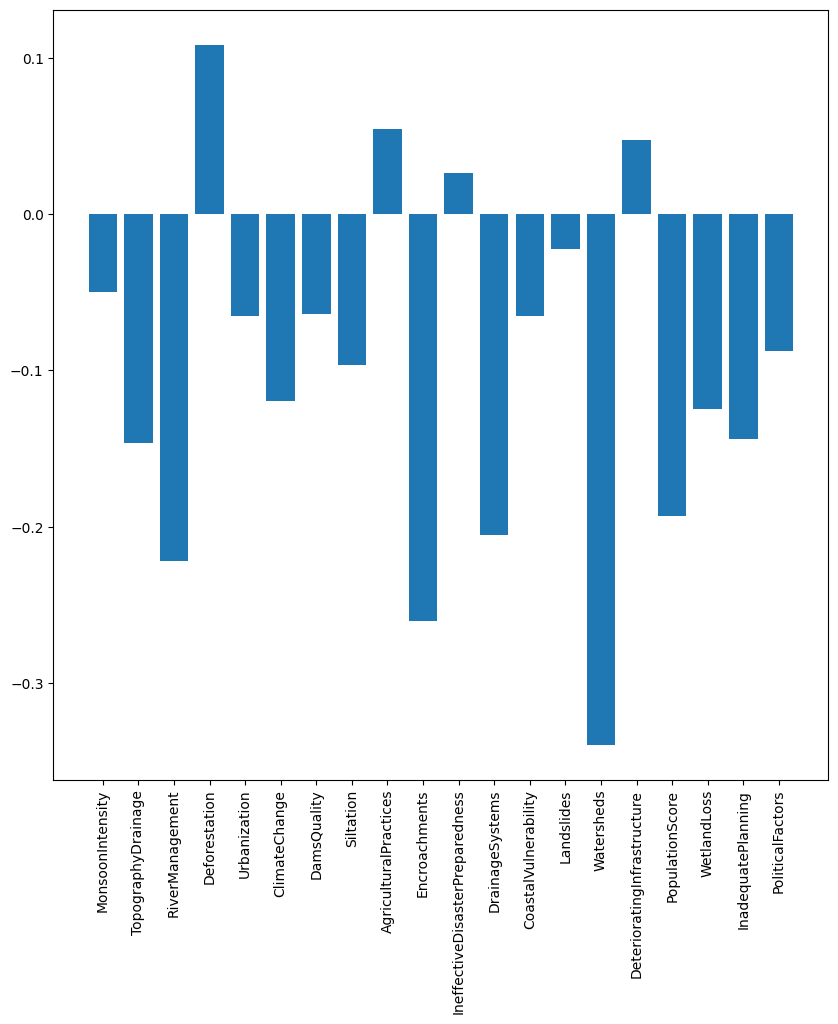

In [37]:
feature_importance = model_LR.coef_[0]
for name,score in enumerate(feature_importance):
    print('Featured name: %0d, and its scored by Logistic Regression Model: %.5f' % (name,score))

grph.figure(figsize=(10,10))
grph.bar(flood_dataset_train_copy.columns.tolist(), feature_importance)
grph.xticks(rotation=90)
grph.show()

# Featured Engineering by Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

Featured name: 0, and its scored by Logistic Regression Model: 0.04303
Featured name: 1, and its scored by Logistic Regression Model: 0.05062
Featured name: 2, and its scored by Logistic Regression Model: 0.04498
Featured name: 3, and its scored by Logistic Regression Model: 0.06918
Featured name: 4, and its scored by Logistic Regression Model: 0.05508
Featured name: 5, and its scored by Logistic Regression Model: 0.04187
Featured name: 6, and its scored by Logistic Regression Model: 0.05350
Featured name: 7, and its scored by Logistic Regression Model: 0.05922
Featured name: 8, and its scored by Logistic Regression Model: 0.04899
Featured name: 9, and its scored by Logistic Regression Model: 0.05488
Featured name: 10, and its scored by Logistic Regression Model: 0.03824
Featured name: 11, and its scored by Logistic Regression Model: 0.04842
Featured name: 12, and its scored by Logistic Regression Model: 0.05466
Featured name: 13, and its scored by Logistic Regression Model: 0.03814
Fe

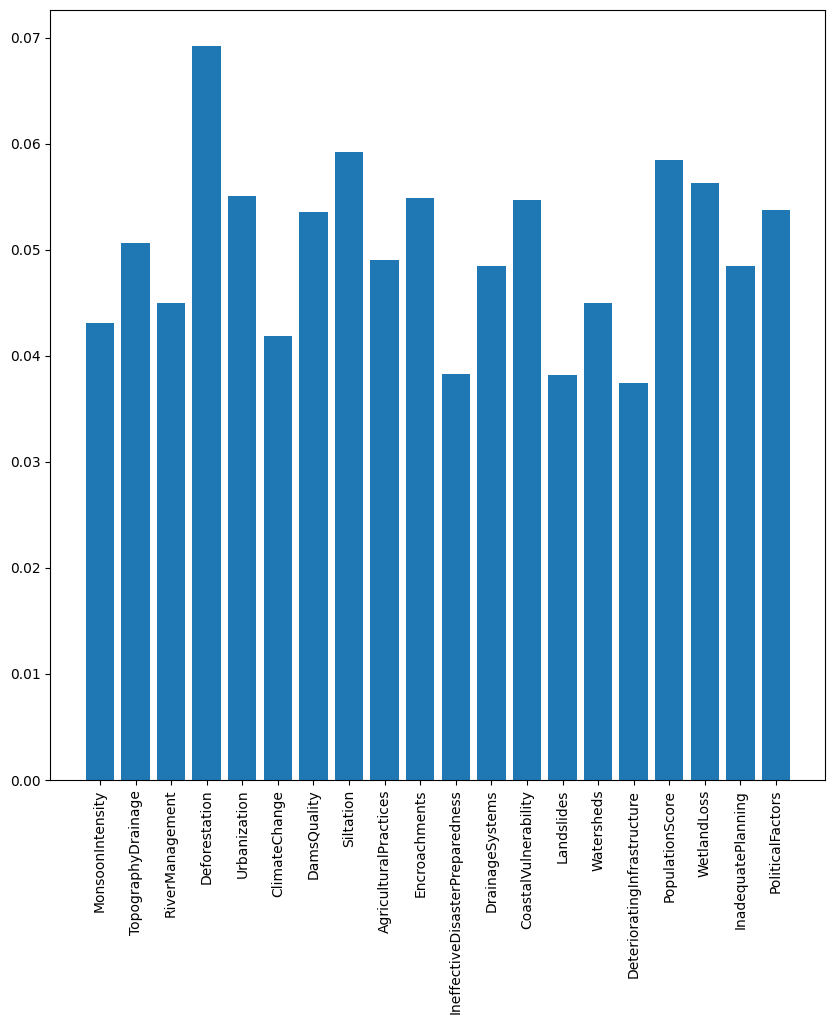

In [39]:
model_DT = DecisionTreeClassifier()
model_DT.fit(flood_dataset_train_partially, dependent_var_transformed_partially)
feature_importance =  model_DT.feature_importances_
for name,score in enumerate(feature_importance):
    print('Featured name: %0d, and its scored by Logistic Regression Model: %.5f' % (name,score))

grph.figure(figsize=(10,10))
grph.bar(flood_dataset_train_copy.columns.tolist(), feature_importance)
grph.xticks(rotation=90)
grph.show()

# Featured Engineering by Random Forest

Featured name: 0, and its scored by Logistic Regression Model: 0.04930
Featured name: 1, and its scored by Logistic Regression Model: 0.04983
Featured name: 2, and its scored by Logistic Regression Model: 0.05144
Featured name: 3, and its scored by Logistic Regression Model: 0.05084
Featured name: 4, and its scored by Logistic Regression Model: 0.05071
Featured name: 5, and its scored by Logistic Regression Model: 0.04936
Featured name: 6, and its scored by Logistic Regression Model: 0.04881
Featured name: 7, and its scored by Logistic Regression Model: 0.04915
Featured name: 8, and its scored by Logistic Regression Model: 0.05015
Featured name: 9, and its scored by Logistic Regression Model: 0.05034
Featured name: 10, and its scored by Logistic Regression Model: 0.04733
Featured name: 11, and its scored by Logistic Regression Model: 0.05048
Featured name: 12, and its scored by Logistic Regression Model: 0.05049
Featured name: 13, and its scored by Logistic Regression Model: 0.04984
Fe

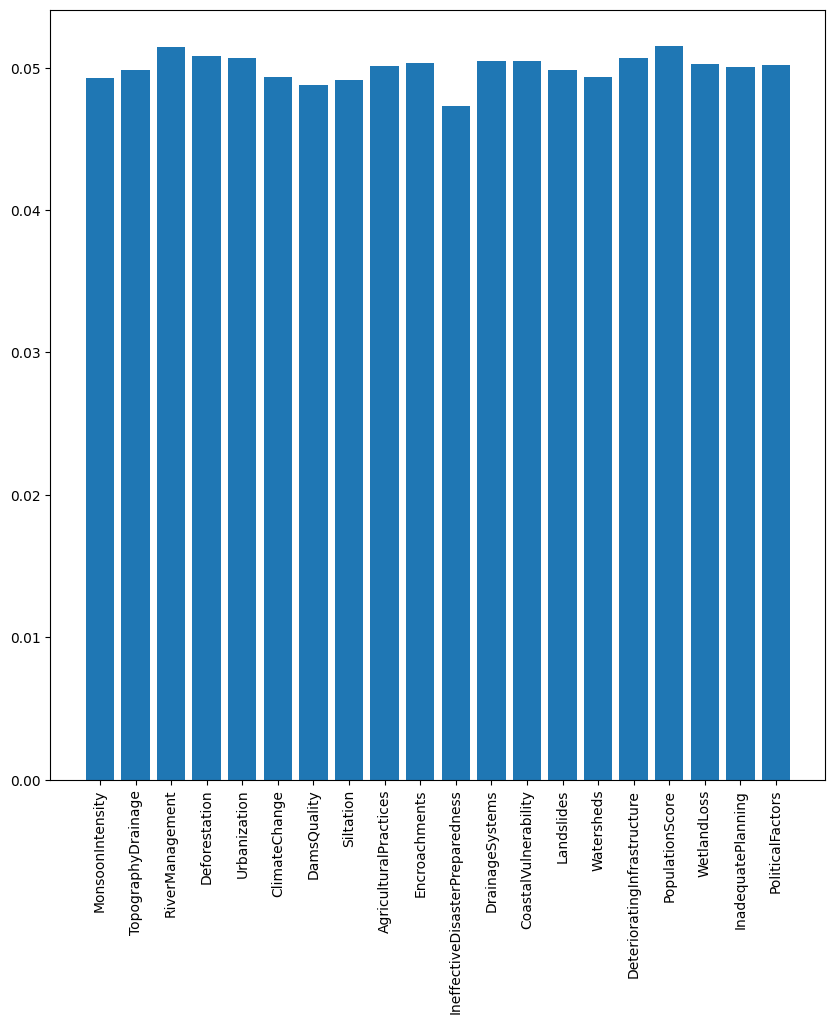

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(flood_dataset_train_partially, dependent_var_transformed_partially)
feature_importance =  model_RF.feature_importances_
for name,score in enumerate(feature_importance):
    print('Featured name: %0d, and its scored by Logistic Regression Model: %.5f' % (name,score))

grph.figure(figsize=(10,10))
grph.bar(flood_dataset_train_copy.columns.tolist(), feature_importance)
grph.xticks(rotation=90)
grph.show()

# **Multiple Linear Regression Method**

In [41]:
flood_dataset_df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

In [42]:
flood_dataset_df.drop(columns=['id'], inplace=True)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
flood_dataset_df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [45]:
formula_Ordinary_Least_Square = 'FloodProbability ~ MonsoonIntensity + TopographyDrainage + RiverManagement + Deforestation + Urbanization + ClimateChange + DamsQuality+Siltation + AgriculturalPractices + Encroachments + IneffectiveDisasterPreparedness + DrainageSystems + CoastalVulnerability + Landslides + Watersheds + DeterioratingInfrastructure + PopulationScore + WetlandLoss + InadequatePlanning + PoliticalFactors'

OLS = ols(formula = formula_Ordinary_Least_Square, data = flood_dataset_df)
Multiple_Regession_model = OLS.fit()
model_results = Multiple_Regession_model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        20:03:40   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

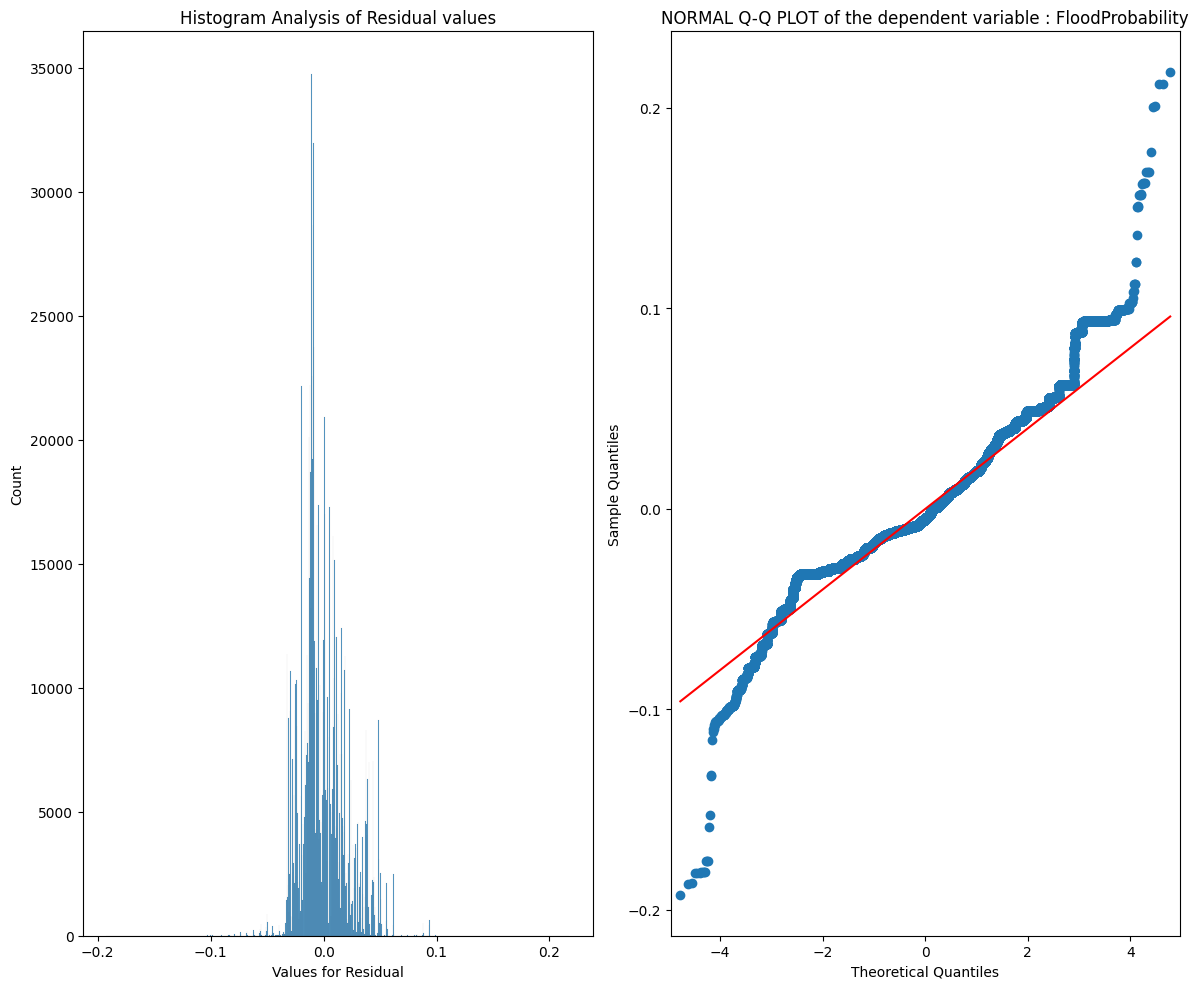

In [46]:
resd = Multiple_Regession_model.resid
fig, axes = grph.subplots(1, 2, figsize = (12,10))
snb.histplot(resd, ax=axes[0])
axes[0].set_xlabel("Values for Residual")
axes[0].set_title("Histogram Analysis of Residual values")
sm.qqplot(resd, line='s',ax = axes[1])
axes[1].set_title("NORMAL Q-Q PLOT of the dependent variable : FloodProbability")
grph.tight_layout()
grph.show()

# **Stacked Model**

In [47]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test=train_test_split(flood_dataset_train, dependent_var_transformed, test_size=0.3, random_state=42)

In [48]:
X_train.shape

(782569, 20)

In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (
    SGDRegressor, 
    BayesianRidge,
)

In [50]:
est = [('model_SGD', SGDRegressor()), ('model_BF',BayesianRidge()),('model_LR',LinearRegression())] 
stacked = StackingRegressor(estimators=est,final_estimator=RandomForestRegressor(n_estimators=50,max_depth=5))

In [51]:
%%time 
stacked.fit(X_train,y_train)

CPU times: user 2min 10s, sys: 9.96 s, total: 2min 20s
Wall time: 2min 1s


StackingRegressor(estimators=[('model_SGD', SGDRegressor()),
                              ('model_BF', BayesianRidge()),
                              ('model_LR', LinearRegression())],
                  final_estimator=RandomForestRegressor(max_depth=5,
                                                        n_estimators=50))

In [52]:
from sklearn.metrics import r2_score
datay_pred = stacked.predict(x_test)
print(f'stacked: {r2_score(y_test,datay_pred)}')

stacked: 0.8639833065341361


In [53]:
r2score=r2_score(y_test,datay_pred)

In [54]:
%%time
model_SGD=SGDRegressor()
model_BF=BayesianRidge()
model_LR=LinearRegression()
for classifier in (model_SGD,model_BF,model_LR):
    classifier.fit(X_train,y_train)
    datay_pred = classifier.predict(x_test)
    print(classifier.__class__.__name__,r2_score(y_test,datay_pred))

SGDRegressor 0.844934611508619
BayesianRidge 0.8450982459738359
LinearRegression 0.8450982459443049
CPU times: user 6.27 s, sys: 1.57 s, total: 7.84 s
Wall time: 4.56 s


# **Test Dataset Prediction**

In [55]:
flood_dataset_test_df = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [56]:
flood_dataset_test_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [57]:
flood_dataset_test_df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [58]:
id_no = flood_dataset_test_df['id']

In [59]:
flood_dataset_test_df.drop('id',axis=1,inplace=True)

**Data Preprocessing Step for Test Dataset**

In [60]:
scaler = StandardScaler()
scaler.fit(flood_dataset_test_df)
flood_dataset_test_df = scaler.transform(flood_dataset_test_df)

**Prediction by Stacking Regressor**

In [61]:
testdata_y_pred = stacked.predict(flood_dataset_test_df)

In [62]:
final_predictions = testdata_y_pred.flatten() 
final_predictions

array([53.10539995, 28.35751153, 28.36675807, ..., 61.85283274,
       47.72945909, 43.32621009])

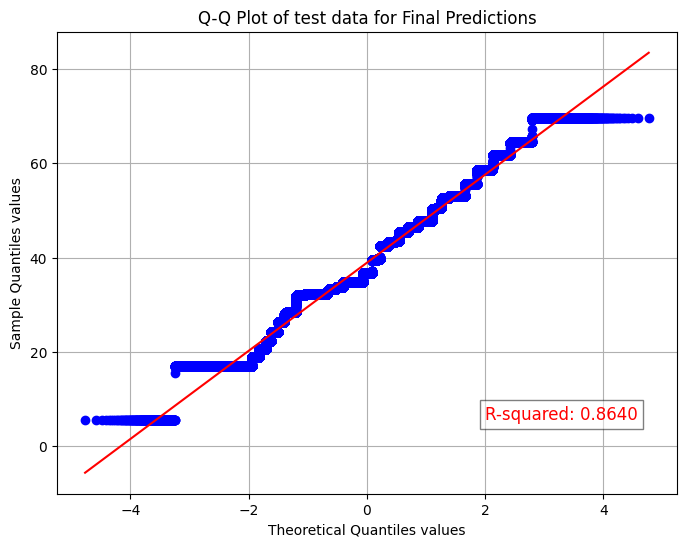

In [63]:
import scipy.stats as stats
grph.figure(figsize=(8, 6))
stats.probplot(final_predictions, dist="norm", plot=grph)
grph.title('Q-Q Plot of test data for Final Predictions')
grph.xlabel('Theoretical Quantiles values')
grph.ylabel('Sample Quantiles values')
grph.text(2, np.min(final_predictions) + 0.2, f'R-squared: {r2score:.4f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
grph.grid(True)
grph.show()

In [64]:
result = pd.DataFrame({'id':id_no,'Flood Probability':testdata_y_pred/100})
result

,id,Flood Probability
0,1117957,0.531054
1,1117958,0.283575
2,1117959,0.283668
3,1117960,0.323298
4,1117961,0.323298
...,...,...
745300,1863257,0.329700
745301,1863258,0.264007
745302,1863259,0.618528
745303,1863260,0.477295


**Prediction by Linear Regressor**

In [65]:
testdata_y_pred = model_LR.predict(flood_dataset_test_df)

In [66]:
testdata_y_pred

array([52.69354176, 29.05658744, 28.94412262, ..., 62.83172317,
       48.17782893, 40.29330009])

**Prediction by SGD Regressor**

In [67]:
testdata_y_pred = model_SGD.predict(flood_dataset_test_df)

In [68]:
testdata_y_pred

array([52.8002868 , 29.10146027, 28.93301817, ..., 62.93444017,
       48.48615424, 40.32487438])

**Prediction by BayesianRidge**

In [69]:
testdata_y_pred = model_BF.predict(flood_dataset_test_df)

In [70]:
testdata_y_pred

array([52.69347649, 29.05663289, 28.94416846, ..., 62.83161194,
       48.17778432, 40.29329276])

# **Linear Regression Vs Linear Regressor**

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
flood_dataset_df = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

In [73]:
flood_dataset_df.drop(['id'], axis = 1, inplace = True)
dataX = flood_dataset_df.drop(['FloodProbability'], axis = 1)
datay = flood_dataset_df['FloodProbability']

X_train, x_test, Y_train, y_test = train_test_split(dataX, datay, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
dataX_train_scaled = scaler.fit_transform(X_train)
dataX_test_scaled = scaler.transform(x_test)

linear_regressor = LinearRegression()
linear_regressor.fit(dataX_train_scaled, Y_train)
datay_pred = linear_regressor.predict(dataX_test_scaled)
print(f'For Linear Regression Method, R2 Square value is: {r2_score(y_test, datay_pred)}')
r2score = r2_score(y_test, datay_pred)

For Linear Regression Method, R2 Square value is: 0.845070099597821


In [74]:
flood_dataset_test_df = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [75]:
id_no = flood_dataset_test_df['id']
flood_dataset_test_df.drop(['id'], axis = 1, inplace = True)
datatest_scaled = scaler.transform(flood_dataset_test_df)
datatest_preds = linear_regressor.predict(datatest_scaled)

In [76]:
result = pd.DataFrame({'id': id_no, 'FloodProbability': datatest_preds})

In [77]:
result

,id,FloodProbability
0,1117957,0.573679
1,1117958,0.455344
2,1117959,0.454751
3,1117960,0.466201
4,1117961,0.466135
...,...,...
745300,1863257,0.477201
745301,1863258,0.449465
745302,1863259,0.624284
745303,1863260,0.550900


In [78]:
final_predictions = datatest_preds.flatten() 
final_predictions

array([0.57367856, 0.45534358, 0.45475069, ..., 0.62428368, 0.55089954,
       0.51146463])

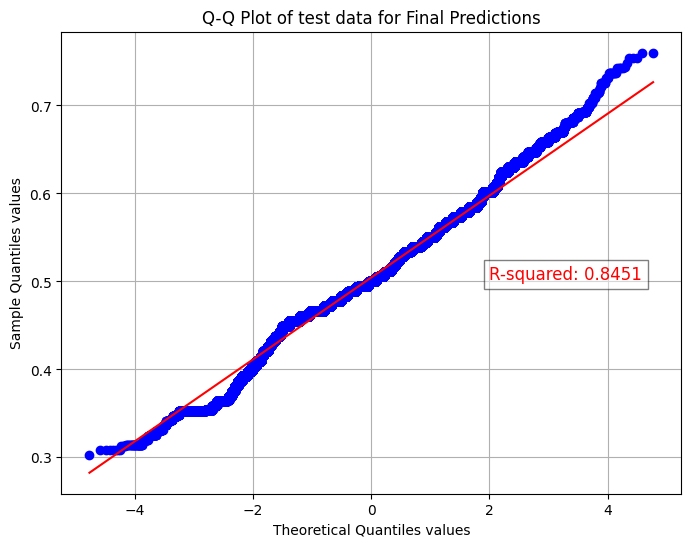

In [79]:
import scipy.stats as stats
grph.figure(figsize=(8, 6))
stats.probplot(final_predictions, dist="norm", plot=grph)
grph.title('Q-Q Plot of test data for Final Predictions')
grph.xlabel('Theoretical Quantiles values')
grph.ylabel('Sample Quantiles values')
grph.text(2, np.min(final_predictions) + 0.2, f'R-squared: {r2score:.4f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
grph.grid(True)
grph.show()

# **Final Submission**

In [80]:
result.to_csv('submission.csv', index=False)

# **Conclusion**

We have seen that in this dataset r2 value does not confirm about the probability rate for test cases as observed between linear regression and linear regressor while linear regressor have 0.8640 r2 value whereas linear regression have 0.8451 r2 value.